In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import datetime
import seaborn as sb

In [3]:
df = pd.read_excel('data.xlsx')
df.head()

,Transaction_ID,Profile ID,Date_of_Booking,Date_of_Service_Requested,Source,Slot of Booking (Hour of the Day)
0,BBCHH,1,2018-05-20,2018-05-21,D,14
1,CHWFD,1,2018-09-23,2018-09-23,C,8
2,DYDMF,2,2018-11-10,2018-11-13,C,11
3,EZYSA,3,2018-04-12,2018-04-16,B,8
4,HWAKX,3,2018-08-05,2018-08-06,B,11


In [4]:
df.tail()

,Transaction_ID,Profile ID,Date_of_Booking,Date_of_Service_Requested,Source,Slot of Booking (Hour of the Day)
30935,FOXPU,16707,2018-09-29,2018-10-02,C,18
30936,ZNKAO,16708,2018-03-12,2018-03-16,A,13
30937,INBOS,16709,2018-01-05,2018-01-10,C,14
30938,CUNOS,16710,2018-02-26,2018-03-03,C,19
30939,DUBEV,16711,2018-04-30,2018-05-03,B,13


In [5]:
df_sorted = df.sort_values("Date_of_Booking",axis=0, ascending= True)
df_sorted.head()

,Transaction_ID,Profile ID,Date_of_Booking,Date_of_Service_Requested,Source,Slot of Booking (Hour of the Day)
25310,SAGTE,13602,2017-12-01,2017-12-03,D,18
14754,SRHLB,7974,2017-12-01,2017-12-03,A,8
10039,RJHNB,5436,2017-12-01,2017-12-06,C,7
3398,VGEHF,1833,2017-12-01,2017-12-02,B,14
22773,CHFWJ,12184,2017-12-01,2017-12-03,C,13


In [6]:
df_sorted['Month_of_Booking'] = pd.to_datetime(df['Date_of_Booking']).dt.to_period('M')

In [7]:
df_sorted["Month_of_Booking"].unique()

<PeriodArray>
['2017-12', '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06',
 '2018-07', '2018-08', '2018-09', '2018-10', '2018-11']
Length: 12, dtype: period[M]

Month_of_Booking
2017-12    2424
2018-01    1892
2018-02    1549
2018-03    1490
2018-04    1346
2018-05    1264
2018-06    1273
2018-07    1208
2018-08    1120
2018-09    1020
2018-10    1110
2018-11    1015
Freq: M, Name: Profile ID, dtype: int64


<Axes: xlabel='Month_of_Booking'>

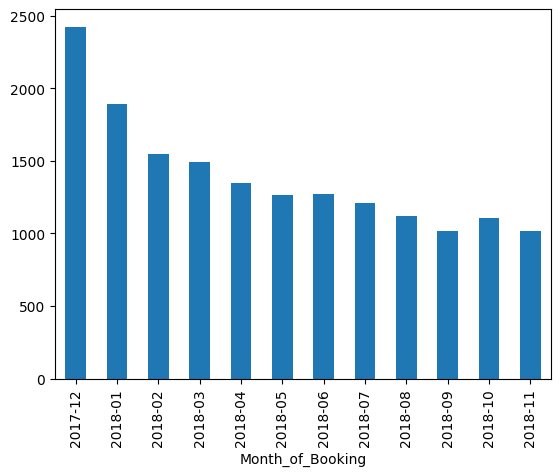

In [8]:
print(df_sorted.drop_duplicates('Profile ID',keep = 'first').groupby("Month_of_Booking").agg("count")["Profile ID"])
(df_sorted.drop_duplicates('Profile ID',keep = 'first').groupby("Month_of_Booking").agg("count")["Profile ID"]).plot.bar()

In [9]:
df_unique = df_sorted.drop_duplicates('Profile ID',keep = 'first')
df_unique_dec = df_unique[df_unique["Date_of_Booking"] < '2018-01-01']

#### Next we follow the following step :
FOR ALL ROWS OF DEC 2017 DATA :<br>
&emsp; &emsp; 1. Get the dates for the next 30 days<br>
&emsp; &emsp; 2. Get the respective data of the next 30 days into a dataframe.<br>
&emsp; &emsp; 3. Check for Repeats<br>
&emsp; &emsp;&emsp; &emsp; 3.1 IF Repeats exist : increment the Count of Repeats

In [10]:
cor = 0 #count of repeats - The number of first time customers repeating orders

for index,row in df_unique_dec.iterrows():
    # Getting the dates for the next 30 days
    dates = np.array(row['Date_of_Booking'], dtype=np.datetime64) + np.arange(30)

    # slicing the dataframe and retrieving only data for the next 30 days
    df_dates = df_sorted[df_sorted['Date_of_Booking'].isin(dates)]

    #calculating the number of Repeat orders by this Customer
    df_dates = df_dates.where(df_dates["Profile ID"] == row['Profile ID'])
    df_dates = df_dates.dropna()
    if len(df_dates) > 1 :
        cor = cor + 1

#### Now that we have the number of first time customers repeating orders in 30 days of their first order for the month of Dec 2017 , we can calculate the percentage of the same

In [11]:
percentage_repeat_for_dec = (cor/len(df_unique_dec))
print('{:.2%}'.format(percentage_repeat_for_dec)," of first time customers in Dec 2017 placed an order within 30 days of their first order")

0.50%  of first time customers in Dec 2017 placed an order within 30 days of their first order


### Answer : 16.63%  of first time customers in Dec 2017 placed an order within 30 days of their first order

## Q3.What is the 90-day repeat rate of users acquired in Jan,Feb,March 2018?

Approach same as the previous question

In [12]:
df_unique = df_sorted.drop_duplicates('Profile ID',keep = 'first')

#retrieving data for Jan to March 2018
df_unique_jan_to_march = df_unique[df_unique["Date_of_Booking"] < '2018-04-01']
df_unique_jan_to_march = df_unique[df_unique["Date_of_Booking"] >= '2018-01-01']

cor = 0 #count of repeats


for index,row in df_unique_jan_to_march.iterrows():
    # Getting the dates for the next 90 days
    dates = np.array(row['Date_of_Booking'], dtype=np.datetime64) + np.arange(90)

    # slicing the dataframe and retrieving only data for the next 90 days
    df_dates = df_sorted[df_sorted['Date_of_Booking'].isin(dates)]

    #calculating the number of Repeat orders by this Customer within the time frame
    df_dates = df_dates.where(df_dates["Profile ID"] == row['Profile ID'])
    df_dates = df_dates.dropna()
    if len(df_dates) > 1 :
        #if repeat order exist, increment COR
        cor = cor + 1

In [13]:
percentage_repeat_for_jan_to_march = (cor/len(df_unique_jan_to_march))
print('{:.2%}'.format(percentage_repeat_for_jan_to_march), "of first time customers in Jan, Feb and March 2018 placed an order within 90 days of their first order")

0.11% of first time customers in Jan, Feb and March 2018 placed an order within 90 days of their first order


### Result : 13.26% of first time customers in Jan, Feb and March 2018 placed an order within 90 days of their first order

## Q5. Plot the distribution of users by frequency of their 90-day repeat (Number of times user repeated within first 90 days)


#### First, we initialize two columns <br> 1. Gap - Reresents Gap between Date of Booking and Date of Service Requested. <br> 90_day_repeat - contains value 1 or 0 i.e there was another order by the customer within 90 days or not

In [14]:
df_unique = df_sorted.drop_duplicates('Profile ID',keep = 'first')
df_unique['Gap'] = 0
df_unique['90_day_repeat'] = 0

<ipython-input-14-4fef1bb1df7f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique['Gap'] = 0
<ipython-input-14-4fef1bb1df7f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique['90_day_repeat'] = 0


In [15]:
df_unique.head()

,Transaction_ID,Profile ID,Date_of_Booking,Date_of_Service_Requested,Source,Slot of Booking (Hour of the Day),Month_of_Booking,Gap,90_day_repeat
25310,SAGTE,13602,2017-12-01,2017-12-03,D,18,2017-12,0,0
14754,SRHLB,7974,2017-12-01,2017-12-03,A,8,2017-12,0,0
10039,RJHNB,5436,2017-12-01,2017-12-06,C,7,2017-12,0,0
3398,VGEHF,1833,2017-12-01,2017-12-02,B,14,2017-12,0,0
22773,CHFWJ,12184,2017-12-01,2017-12-03,C,13,2017-12,0,0


### An important factor to consider is that we have data up till 30 Nov 2018. Hence, we can only have 90-day-repeat
### data till ```Septermber 1,2018```

In [16]:
df_unique = df_unique[df_unique["Date_of_Booking"] <= '2018-09-01']

In [17]:
# setting transaction id as index for ease in slicing
df_unique = df_unique.set_index("Transaction_ID", drop = False)

cor = 0 #count of repeats

#initializing frequency dictionary
freq = dict.fromkeys(range(1,16),0)

for index,row in df_unique.iterrows():

    # Getting the dates for the next 90 days
    dates = np.array(row['Date_of_Booking'], dtype=np.datetime64) + np.arange(90)

    # slicing the dataframe and retrieving only data for the next 90 days
    df_dates = df_sorted[df_sorted['Date_of_Booking'].isin(dates)]

    #calculating the number of Repeat orders by this Customer within the time frame
    df_dates = df_dates.where(df_dates["Profile ID"] == row['Profile ID'])
    df_dates = df_dates.dropna()
    if len(df_dates) > 1 :
        #if repeat order exist, increment COR
        cor = cor + 1

        #update number of customers per freq
        freq[len(df_dates)-1] = freq[len(df_dates)-1] + 1

        #update 90_day_repeat column value for this customer
        df_unique.loc[row['Transaction_ID'],'90_day_repeat'] = 1


### Plotting

27 {1: 27, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0}


([<matplotlib.axis.XTick at 0x79373e44bdc0>,
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12'),
  Text(12, 0, '13'),
  Text(13, 0, '14'),
  Text(14, 0, '15')])

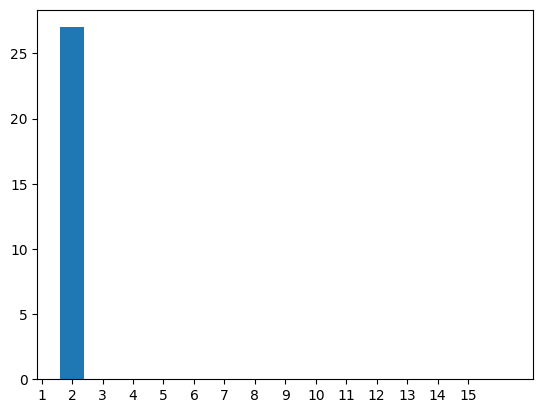

In [18]:
print(cor,freq)
plt.bar(freq.keys(),freq.values())
plt.xticks(range(len(freq)), list(freq.keys()))

([<matplotlib.axis.XTick at 0x79373dab6e00>,
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12'),
  Text(12, 0, '13'),
  Text(13, 0, '14'),
  Text(14, 0, '15')])

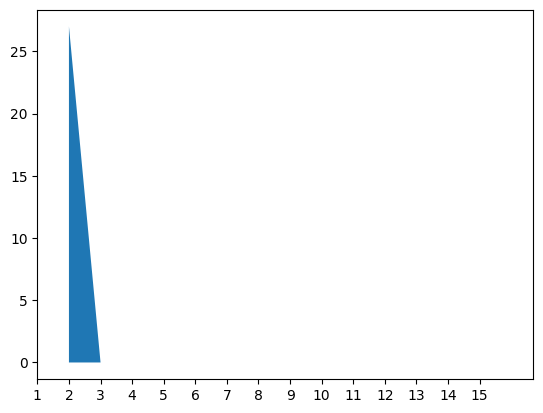

In [19]:
plt.fill_between(freq.keys(), freq.values())
plt.xticks(range(len(freq)), list(freq.keys()))

## Insight from above

#### A total of 2520 customers placed an order within 90 days of their first order, Majority of whom had a frequency of 1,2& 3 i.e 2334 out of 2520 which accounts for 92.6% of the total customers placing an order within 90 days of their first order.

## Q4. Use logistic regression to predict the 90-day repeat of users acquired in November 2018. Hint: Use Source, Slot of Booking, Gap between date of Booking and date of service requested as predictor variables"

First, We import certain libraries which will be useful for creating the model


In [20]:
import seaborn as sb
import sklearn
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier

In [21]:
%matplotlib inline

#### Slicing data required for the model

Columns such as ``` Transaction_ID, Profile_ID``` cannot be instrumental in predicting future 90_day_repeats as they represent past transactions and already existing users.

In [22]:
X = df_unique.loc[:,['Date_of_Booking',"Date_of_Service_Requested","Source","Slot of Booking (Hour of the Day)",'Month_of_Booking',"Gap","90_day_repeat"]]

<Axes: xlabel='Month_of_Booking', ylabel='count'>

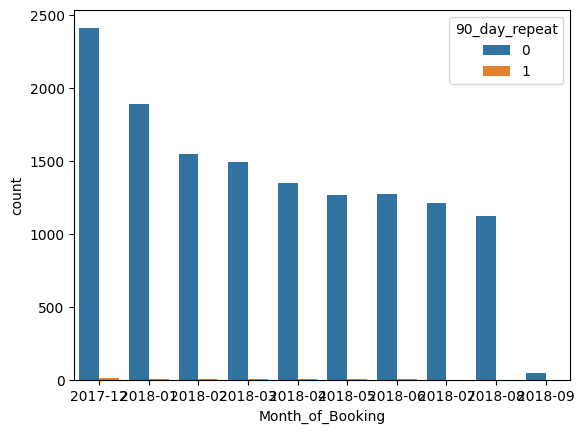

In [23]:
sb.countplot(x='Month_of_Booking',hue='90_day_repeat', data = X)

### An important factor to consider is that we have data up till 30 Nov 2018. Hence, we can only have 90-day-repeat
### data till ```Septermber 1,2018```

In [24]:
X = X[X['Date_of_Booking']<'2018-09-01']

<Axes: xlabel='Month_of_Booking', ylabel='count'>

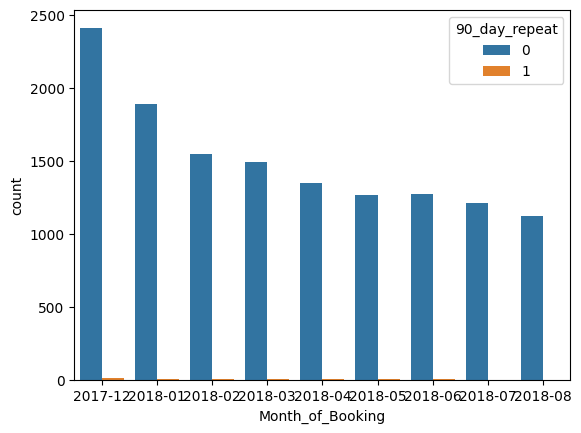

In [25]:
sb.countplot(x='Month_of_Booking',hue='90_day_repeat', data = X)

#### Assigning y as the dependent variable

In [26]:
y =X['90_day_repeat']
y.value_counts()

90_day_repeat
0    13539
1       27
Name: count, dtype: int64

In [27]:
X['90_day_repeat'].value_counts()

90_day_repeat
0    13539
1       27
Name: count, dtype: int64

#### As the above data is imbalanced, some balancing of data will be required for implementing a model, but first we check for the effect of each present column on the column to be predicted

<Axes: xlabel='Source', ylabel='count'>

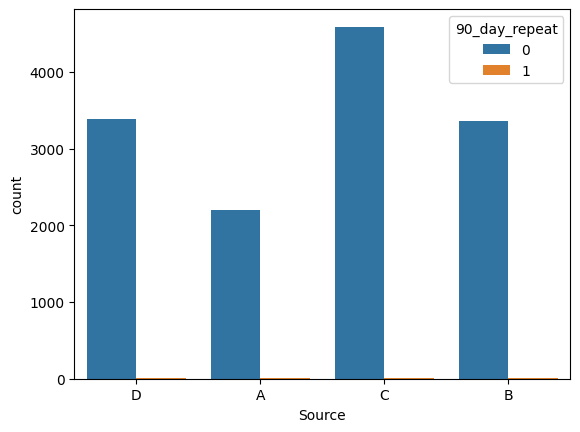

In [28]:
sb.countplot(x='Source',hue=y,data = X)

#### Source seems to have significant effect on 90_day_repeats

In [29]:
import datetime as dt
X['Date_of_Booking'] = X['Date_of_Booking'].map(dt.datetime.toordinal)
X['Date_of_Service_Requested'] =X['Date_of_Service_Requested'].map(dt.datetime.toordinal)


In [30]:
X['Gap'] = X['Date_of_Service_Requested'] - X['Date_of_Booking']

<Axes: xlabel='Gap', ylabel='count'>

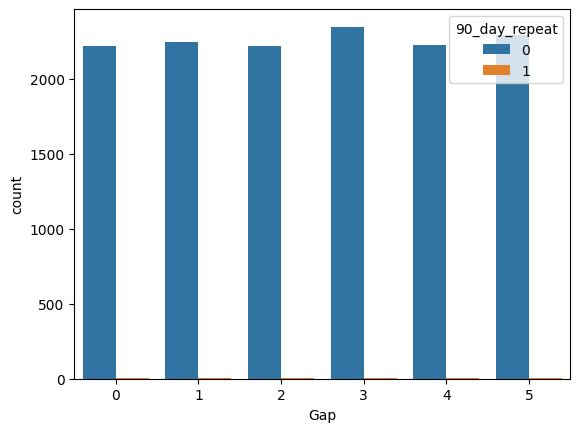

In [31]:
sb.countplot(x='Gap',hue=y,data = X)

#### The Gap between service requested nad service delivery does't seem to have any effect on the 90_day_repeat

In [32]:
X = X.drop(columns = ['Date_of_Booking','Date_of_Service_Requested','Gap']) # So , we can get rid of it

<Axes: xlabel='Slot of Booking (Hour of the Day)', ylabel='count'>

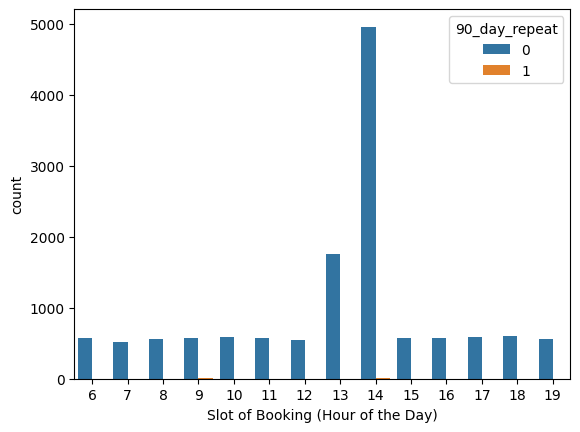

In [33]:
sb.countplot(x='Slot of Booking (Hour of the Day)',hue=y,data = X)

#### The slot of the day seems to have some effect on the 90 day repeats

#### SO, next we are going to group slots for ease of analysis
##### Slots 6-9 as 8
##### Slots 10-12 as 11
##### Slots 13-15 as 14
##### Slots >15 as 17

In [34]:
X['Slot of Booking (Hour of the Day)'] = X['Slot of Booking (Hour of the Day)'].apply(lambda x: 8 if x<=9 else x)
X['Slot of Booking (Hour of the Day)'] = X['Slot of Booking (Hour of the Day)'].apply(lambda x: 11 if (x<13 and x>9) else x)
X['Slot of Booking (Hour of the Day)'] = X['Slot of Booking (Hour of the Day)'].apply(lambda x: 14 if x>12 and x<16 else x)
X['Slot of Booking (Hour of the Day)'] = X['Slot of Booking (Hour of the Day)'].apply(lambda x: 17 if x>15 else x)

In [35]:
X['Slot of Booking (Hour of the Day)'].value_counts()

Slot of Booking (Hour of the Day)
14    7301
17    2333
8     2227
11    1705
Name: count, dtype: int64

<Axes: xlabel='Slot of Booking (Hour of the Day)', ylabel='count'>

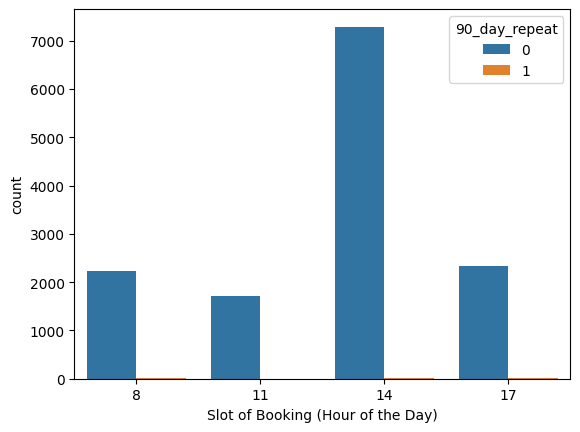

In [36]:
sb.countplot(x='Slot of Booking (Hour of the Day)',hue=y,data = X)

In [37]:
X = X.drop(columns=['90_day_repeat','Month_of_Booking']) #90_day_repeat is the dependent variable and Month isn't required

In [38]:
X.head()

,Source,Slot of Booking (Hour of the Day)
Transaction_ID,,
SAGTE,D,17
SRHLB,A,8
RJHNB,C,8
VGEHF,B,14
CHFWJ,C,14


#### We are required to convert Source to numeric format for ease in Logistic Regression model generation

In [39]:
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()
X['Source'] = number.fit_transform(X['Source'].astype('str'))

#number.fit_transform(x_test['Source'].astype('str')) #GET DUMMIES

In [40]:
X['Source'].value_counts()

Source
2    4595
3    3398
1    3367
0    2206
Name: count, dtype: int64

<Axes: xlabel='90_day_repeat'>

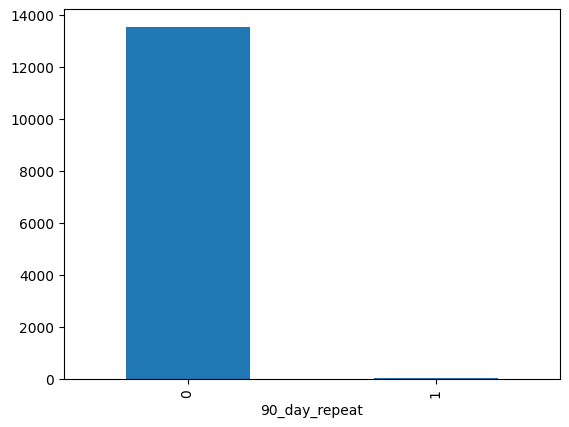

In [41]:
(y.value_counts()).plot.bar()

## As mentioned earlier, due to the imbalance in data we will be required to balance the data out

In [42]:
logisticRegr = LogisticRegression(class_weight = 'balanced') # Generating a logistic regression model
logisticRegr.fit(X,y)

LogisticRegression(class_weight='balanced')

#### Side Note :  Also tried balancing out data using SMOTE, it produced the same results

## Preparing the Nov 2018 data

In [43]:
import datetime as dt
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()

df_nov = df_sorted.drop_duplicates('Profile ID',keep = 'first')
df_nov = df_nov[df_nov["Date_of_Booking"] >= '2018-11-01']
df_nov.head()

,Transaction_ID,Profile ID,Date_of_Booking,Date_of_Service_Requested,Source,Slot of Booking (Hour of the Day),Month_of_Booking
19980,CSOCG,10709,2018-11-01,2018-11-02,D,11,2018-11
24338,BPWLE,13034,2018-11-01,2018-11-06,C,14,2018-11
7255,YYFGQ,3860,2018-11-01,2018-11-03,C,13,2018-11
24386,YBNUC,13061,2018-11-01,2018-11-06,B,13,2018-11
10666,FOBFD,5776,2018-11-01,2018-11-01,B,14,2018-11


In [44]:
df_nov['Date_of_Booking'] = df_nov['Date_of_Booking'].map(dt.datetime.toordinal)
df_nov['Date_of_Service_Requested'] =df_nov['Date_of_Service_Requested'].map(dt.datetime.toordinal)
df_nov['Gap'] = df_nov['Date_of_Service_Requested'] - df_nov['Date_of_Booking']
df_nov.head()

,Transaction_ID,Profile ID,Date_of_Booking,Date_of_Service_Requested,Source,Slot of Booking (Hour of the Day),Month_of_Booking,Gap
19980,CSOCG,10709,736999,737000,D,11,2018-11,1
24338,BPWLE,13034,736999,737004,C,14,2018-11,5
7255,YYFGQ,3860,736999,737001,C,13,2018-11,2
24386,YBNUC,13061,736999,737004,B,13,2018-11,5
10666,FOBFD,5776,736999,736999,B,14,2018-11,0


In [45]:
df_nov = df_nov.loc[:,['Source','Slot of Booking (Hour of the Day)']]

In [46]:
df_nov['Slot of Booking (Hour of the Day)'] = df_nov['Slot of Booking (Hour of the Day)'].apply(lambda x: 8 if x<=9 else x)
df_nov['Slot of Booking (Hour of the Day)'] = df_nov['Slot of Booking (Hour of the Day)'].apply(lambda x: 11 if (x<13 and x>9) else x)
df_nov['Slot of Booking (Hour of the Day)'] = df_nov['Slot of Booking (Hour of the Day)'].apply(lambda x: 14 if x>12 and x<16 else x)
df_nov['Slot of Booking (Hour of the Day)'] = df_nov['Slot of Booking (Hour of the Day)'].apply(lambda x: 17 if x>15 else x)

In [47]:
df_nov['Source'] = number.fit_transform(df_nov['Source'].astype('str'))
df_nov.head()

,Source,Slot of Booking (Hour of the Day)
19980,3,11
24338,2,14
7255,2,14
24386,1,14
10666,1,14


In [48]:
print(logisticRegr.predict(df_nov))
a = logisticRegr.predict(df_nov)
unique_elements, counts_elements = np.unique(a, return_counts=True)
print(unique_elements)

[1 1 1 ... 1 1 1]
[0 1]


In [49]:
predictions_nov = dict(zip(unique_elements, counts_elements))

In [50]:
predictions_nov

{0: 499, 1: 516}

([<matplotlib.axis.XTick at 0x7937396ef5b0>,
 [Text(0, 0, '0'), Text(1, 0, '1')])

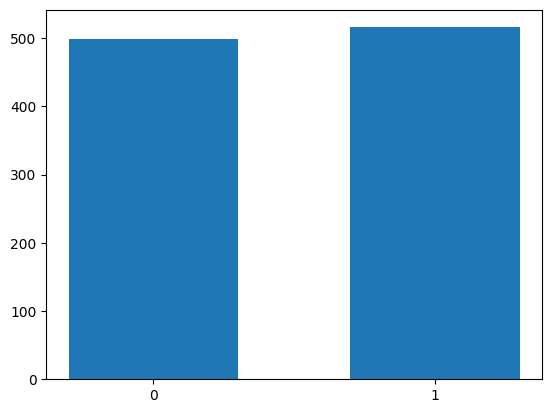

In [51]:
plt.bar(predictions_nov.keys(),predictions_nov.values(), width=0.6)
plt.xticks(np.arange(2))

### Result : 283 first time customers ordering within 90 days of first order predicted for Nov 2018

In [52]:
import datetime
df1 = df_sorted
df1['Day_of_week'] = df1['Date_of_Service_Requested'].apply(lambda x: x.strftime('%A'))

In [53]:
df1['Day_of_week'].unique()

array(['Sunday', 'Wednesday', 'Saturday', 'Friday', 'Tuesday', 'Monday',
       'Thursday'], dtype=object)

In [54]:
df1['Day_of_week'].value_counts()

Day_of_week
Saturday     4575
Sunday       4548
Thursday     4430
Wednesday    4383
Friday       4382
Tuesday      4354
Monday       4268
Name: count, dtype: int64

In [55]:
len(df1[df1['Day_of_week']=='Saturday'])/len(df1[df1['Day_of_week']=='Monday'])

1.0719306466729148

## Number of Services Requested for Saturday are on average 7% more than for Mondays

In [56]:
df1['Slot of Booking (Hour of the Day)'] = df1['Slot of Booking (Hour of the Day)'].apply(lambda x: 8 if x<9 else x)
df1['Slot of Booking (Hour of the Day)'] = df1['Slot of Booking (Hour of the Day)'].apply(lambda x: 11 if (x<13 and x>=9) else x)
df1['Slot of Booking (Hour of the Day)'] = df1['Slot of Booking (Hour of the Day)'].apply(lambda x: 14 if x>12 and x<=16 else x)
df1['Slot of Booking (Hour of the Day)'] = df1['Slot of Booking (Hour of the Day)'].apply(lambda x: 17 if x>=17 else x)

In [57]:
df1['Slot of Booking (Hour of the Day)'].value_counts()

Slot of Booking (Hour of the Day)
14    18057
11     5226
17     3914
8      3743
Name: count, dtype: int64

In [58]:
A = df1['Slot of Booking (Hour of the Day)'][~df1['Day_of_week'].isin(['Saturday','Sunday']) ]

In [59]:
B = A[A.isin([8,17])]

In [60]:
(A.count()-B.count())/A.count()

0.7507448320117339

## 66% of services requested during the weekdays were during working hours i.e between 9am - 4pm

In [61]:
(A.count()-B.count())/len(df1)

0.5293794440853264

## 47% of all bookings are for working hours during the weekdays

In [62]:
A = df1['Slot of Booking (Hour of the Day)'][df1['Day_of_week'].isin(['Saturday','Sunday']) ]
A.count()/len(df1)

0.2948610213316096

In [63]:
(A.count()/len(df1)) - (2/7)

0.009146735617323876

In [64]:
len(df1[df1['Slot of Booking (Hour of the Day)']==14])/len(df1) * 100

58.36134453781513